En esta versión escalaremos los datos mediante utilidades de sk-learn

In [107]:
import numpy as np
datos = np.load('datasets/pisos_vendidos.npy')

In [108]:
#Vamos a dividir la primera columna (X = metros) de la segunda (y = precios)
X = datos.T[0].reshape(-1, 1)
y = datos.T[1]

In [109]:
from sklearn.preprocessing import MinMaxScaler
#Escalamos los datos, en un rango [0, 1]:
X_scaler = MinMaxScaler(feature_range=(0, 1))
X = X_scaler.fit_transform(X)

#Y lo mismo para la y:
y_scaler = MinMaxScaler(feature_range=(0, 1))
y = y_scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)

In [110]:
#Contruimos la red, que será muy simple: una única neurona
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1,input_shape=(1,), activation=None, kernel_constraint='NonNeg' ))

In [112]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
    )

history = model.fit(
    X, y,
    epochs=100,
    batch_size=4)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2054 - mse: 0.2054
Epoch 2/100
4/4 [==============================] - 0s 958us/step - loss: 0.2014 - mse: 0.2014
Epoch 3/100
4/4 [==============================] - 0s 606us/step - loss: 0.1977 - mse: 0.1977
Epoch 4/100
4/4 [==============================] - 0s 778us/step - loss: 0.1939 - mse: 0.1939
Epoch 5/100
4/4 [==============================] - 0s 741us/step - loss: 0.1899 - mse: 0.1899
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1864 - mse: 0.1864
Epoch 7/100
4/4 [==============================] - 0s 689us/step - loss: 0.1824 - mse: 0.1824
Epoch 8/100
4/4 [==============================] - 0s 967us/step - loss: 0.1791 - mse: 0.1791
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1760 - mse: 0.1760
Epoch 10/100
4/4 [==============================] - 0s 728us/step - loss: 0.1722 - mse: 0.1722
Epoch 11/100
4/4 [==============================] - 0s 1ms/step -

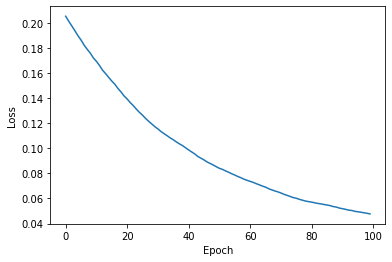

In [113]:
#Vemos el proceso de entrenamiento
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.plot(history.history['loss'])
plt.show()

In [119]:
score, mse = model.evaluate(X, y)
print('Score:', score)
error = y_scaler.inverse_transform( np.square(mse).reshape(-1,1) ).reshape(-1)
print('Error:', np.round(error[0],2), 'euros')

1/1 [==============================] - 0s 12ms/step - loss: 0.0474 - mse: 0.0474
Score: 0.04740624129772186
Error: 45240.47 euros


In [122]:
#Predecimos cuánto vale un piso de 70 metros cuadrados
X_new = [ [70] ]
#hay que escalar los datos
X_new = X_scaler.transform(X_new)
y_pred = model.predict(X_new)

#y desescalar los datos:
y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
print(np.round(y_pred[0],2), "euros")


77796.02 euros
